*Let us import understand the dataset properly*


In [24]:
import pandas as pd
import numpy as np

raw_data =  pd.read_csv("House_Rent_Dataset.csv")

print(raw_data.info(),"\n\n\n")
print(raw_data.describe())


print("\n\n\n")

print(raw_data['Area Locality'].nunique())

'''
Dropping area locality as well as it has too many unique values
as well as Tenant Preferred, Point of Contact,Floor,Posted On as they are not relevant to the rent
'''

raw_data.drop(columns=['Tenant Preferred','Point of Contact','Floor','Area Locality','Posted On'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None 



               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.9658

*Let's perform some eda on this dataset*







BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Bathroom             0
dtype: int64


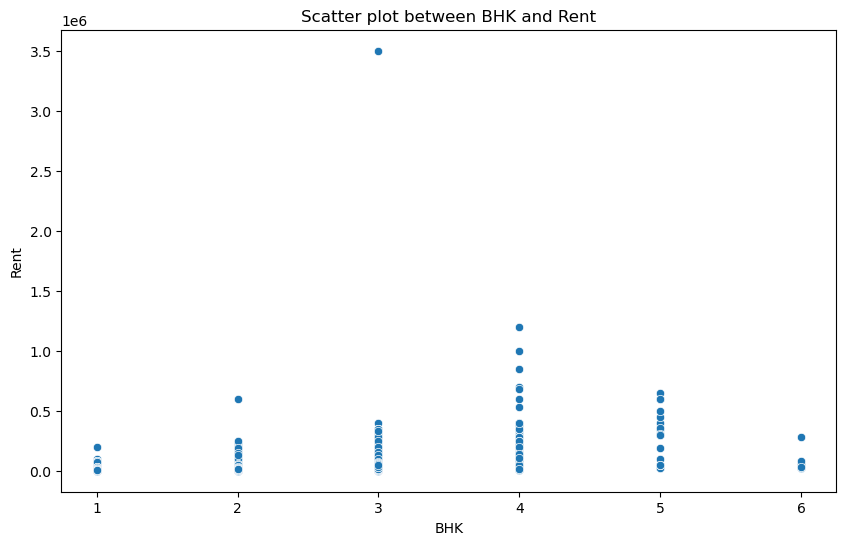

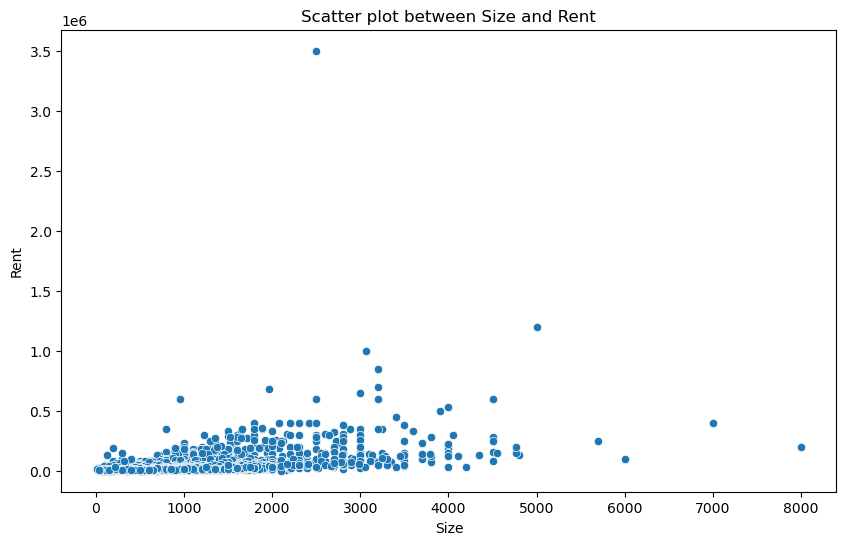

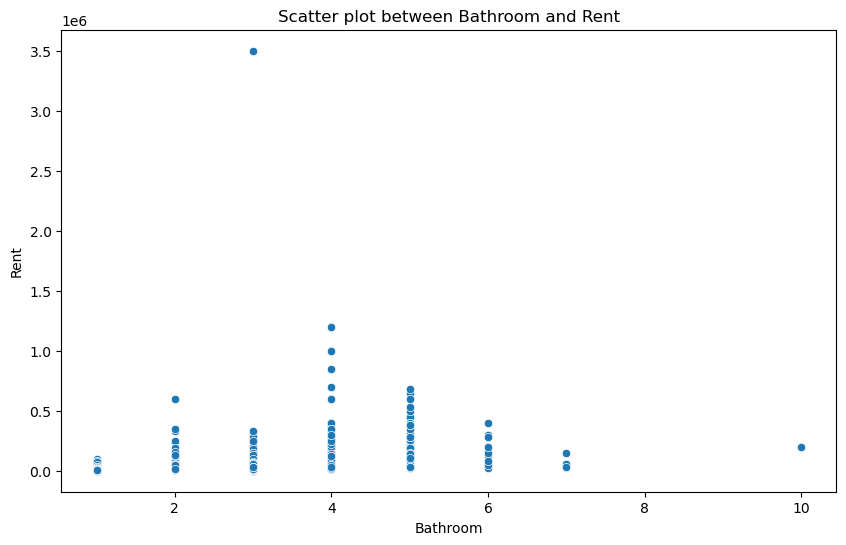

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


raw_data.isnull().sum()
print("\n\n\n")

print(raw_data.isnull().sum())


numerical_cols = raw_data.select_dtypes(include=['number']).columns

for col in numerical_cols:
    if col != "Rent":
        plt.figure(figsize=(10,6))
        sns.scatterplot(data=raw_data, x=col, y="Rent")
        plt.title(f"Scatter plot between {col} and Rent")
        plt.show()






*Convert categorical variables into numerical variables using one-hot encoding*

In [28]:
cat_columns = raw_data.select_dtypes(include=['object']).columns

raw_data = pd.get_dummies(raw_data, columns=cat_columns, drop_first=True)

raw_data = raw_data.astype(int)

# Convert boolean columns to numeric as linear regression doesn't accept boolean values

raw_data.info()

print('\n\n')

raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   BHK                               4746 non-null   int64
 1   Rent                              4746 non-null   int64
 2   Size                              4746 non-null   int64
 3   Bathroom                          4746 non-null   int64
 4   Area Type_Carpet Area             4746 non-null   int64
 5   Area Type_Super Area              4746 non-null   int64
 6   City_Chennai                      4746 non-null   int64
 7   City_Delhi                        4746 non-null   int64
 8   City_Hyderabad                    4746 non-null   int64
 9   City_Kolkata                      4746 non-null   int64
 10  City_Mumbai                       4746 non-null   int64
 11  Furnishing Status_Semi-Furnished  4746 non-null   int64
 12  Furnishing Status_Unfurnished     

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
count,4746.000000,4.746000e+03,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866,0.484197,0.515381,0.187737,0.127476,0.182891,0.110409,0.204804,0.474294,0.382427
std,0.832256,7.810641e+04,634.202328,0.884532,0.499803,0.499816,0.390543,0.333540,0.386618,0.313432,0.403601,0.499391,0.486031
min,1.000000,1.200000e+03,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000e+04,550.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.600000e+04,850.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6.000000,3.500000e+06,8000.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
